### Test the yahoo finance

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import set_style

## import model objects
from sklearn.model_selection import train_test_split
import yfinance as yf

from sklearn.preprocessing import StandardScaler

In [2]:
df= pd.read_csv("../Data/dataset_others_class.csv")

In [4]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [5]:
df.dtypes

Date                  datetime64[ns, UTC]
CADUSD=X_Open                     float64
CADUSD=X_Close                    float64
CADUSD=X_High                     float64
CADUSD=X_Low                      float64
                             ...         
F_ROC                             float64
F_PVT                             float64
F_Bollinger_Upper                 float64
F_Bollinger_Lower                 float64
F_Close_pred_class                  int64
Length: 155, dtype: object

In [6]:
df.describe()

,CADUSD=X_Open,CADUSD=X_Close,CADUSD=X_High,CADUSD=X_Low,CADUSD=X_Volume,CADUSD=X_Change,CADUSD=X_Gain,CADUSD=X_Loss,CADUSD=X_Avg_Gain,CADUSD=X_Avg_Loss,...,F_RSI,F_k_percent,F_r_percent,F_MACD,F_MACD_EMA,F_ROC,F_PVT,F_Bollinger_Upper,F_Bollinger_Lower,F_Close_pred_class
count,1237.000000,1237.000000,1237.000000,1237.000000,1237.0,1237.000000,1237.000000,1237.000000,1237.000000,1237.000000,...,1237.000000,1237.000000,1237.000000,1237.000000,1237.000000,1237.000000,1.237000e+03,1237.000000,1237.000000,1237.000000
mean,0.758633,0.758637,0.760732,0.756380,0.0,-0.000026,0.001221,0.001247,0.001222,0.001246,...,50.709762,49.819518,-50.180482,0.010772,0.010580,0.740316,9.941460e+07,13.119785,10.870765,0.489086
std,0.028260,0.028256,0.028313,0.028251,0.0,0.003274,0.001931,0.001986,0.000539,0.000647,...,17.235668,30.409753,30.409753,0.421543,0.395604,10.283284,6.203849e+07,3.942885,3.134942,0.500083
min,0.690026,0.689741,0.693371,0.681826,0.0,-0.012518,0.000000,0.000000,0.000048,0.000016,...,8.700013,0.000000,-100.000000,-1.071207,-0.953758,-40.504446,-8.287094e+07,5.333265,3.663582,0.000000
25%,0.736106,0.736106,0.738007,0.734338,0.0,-0.001900,0.000000,0.000000,0.000861,0.000809,...,39.339368,22.988487,-77.011513,-0.208349,-0.203198,-5.059206,6.629778e+07,11.077180,9.076939,0.000000
50%,0.752117,0.752049,0.753517,0.750047,0.0,-0.000024,0.000000,0.000024,0.001170,0.001165,...,50.068922,48.951025,-51.048975,0.005962,0.010275,0.195786,1.172903e+08,13.086324,11.188883,0.000000
75%,0.783644,0.783576,0.786046,0.780665,0.0,0.001853,0.001853,0.001900,0.001554,0.001513,...,63.233880,78.135583,-21.864417,0.241499,0.230694,6.650648,1.374546e+08,14.868315,12.244718,1.000000
max,0.830599,0.830703,0.832778,0.829009,0.0,0.012381,0.012381,0.012518,0.003353,0.004876,...,92.692054,100.000000,-0.000000,1.382432,1.213766,38.490564,2.332063e+08,26.710337,19.065638,1.000000


In [7]:
df.head()

,Date,CADUSD=X_Open,CADUSD=X_Close,CADUSD=X_High,CADUSD=X_Low,CADUSD=X_Volume,CADUSD=X_Change,CADUSD=X_Gain,CADUSD=X_Loss,CADUSD=X_Avg_Gain,...,F_RSI,F_k_percent,F_r_percent,F_MACD,F_MACD_EMA,F_ROC,F_PVT,F_Bollinger_Upper,F_Bollinger_Lower,F_Close_pred_class
0,2019-11-26 00:00:00+00:00,0.751665,0.751705,0.752842,0.750999,0.0,-0.000418,0.000000,0.000418,0.000289,...,62.087549,73.913071,-26.086929,0.006892,0.002249,-0.331855,2.394865e+06,9.188927,8.586074,1
1,2019-11-27 00:00:00+00:00,0.753597,0.753636,0.754205,0.752502,0.0,0.001932,0.001932,0.000000,0.000427,...,67.610216,89.583482,-10.416518,0.019164,0.005663,0.220269,2.768411e+06,9.183159,8.647842,0
2,2019-11-29 00:00:00+00:00,0.753125,0.753029,0.753211,0.751145,0.0,-0.000607,0.000000,0.000607,0.000427,...,62.910674,81.250149,-18.749851,0.025755,0.009711,0.221244,2.710846e+06,9.165730,8.712270,0
3,2019-12-02 00:00:00+00:00,0.752734,0.752791,0.753296,0.751569,0.0,-0.000238,0.000000,0.000238,0.000419,...,57.178300,70.833433,-29.166567,0.027163,0.013223,2.270145,2.505366e+06,9.172619,8.717381,0
4,2019-12-03 00:00:00+00:00,0.751552,0.751710,0.752899,0.750728,0.0,-0.001081,0.000000,0.001081,0.000419,...,45.657569,45.833433,-54.166567,0.019687,0.014522,1.137661,1.963927e+06,9.166840,8.712161,1


In [8]:
df = df.rename(columns={'F_Close_pred_class': 'F_prediction'})

In [9]:
df.columns

Index(['Date', 'CADUSD=X_Open', 'CADUSD=X_Close', 'CADUSD=X_High',
       'CADUSD=X_Low', 'CADUSD=X_Volume', 'CADUSD=X_Change', 'CADUSD=X_Gain',
       'CADUSD=X_Loss', 'CADUSD=X_Avg_Gain',
       ...
       'F_RSI', 'F_k_percent', 'F_r_percent', 'F_MACD', 'F_MACD_EMA', 'F_ROC',
       'F_PVT', 'F_Bollinger_Upper', 'F_Bollinger_Lower', 'F_prediction'],
      dtype='object', length=155)

In [10]:
## Remove open, close, high, low, vol columns
open_cols = [col for col in df.columns if '_Open' in col]
close_cols = [col for col in df.columns if '_Close' in col]
high_cols = [col for col in df.columns if '_High' in col]
low_cols = [col for col in df.columns if '_Low' in col]
vol_cols = [col for col in df.columns if '_Volume' in col]

df = df.drop(columns=open_cols)
df = df.drop(columns=close_cols)
df = df.drop(columns=high_cols)
df = df.drop(columns=low_cols)
df = df.drop(columns=vol_cols)

#df

In [11]:
df.head()

,Date,CADUSD=X_Change,CADUSD=X_Gain,CADUSD=X_Loss,CADUSD=X_Avg_Gain,CADUSD=X_Avg_Loss,CADUSD=X_SMA,CADUSD=X_EMA,CADUSD=X_change_in_price,CADUSD=X_RSI,...,F_change_in_price,F_RSI,F_k_percent,F_r_percent,F_MACD,F_MACD_EMA,F_ROC,F_PVT,F_Bollinger_Upper,F_prediction
0,2019-11-26 00:00:00+00:00,-0.000418,0.000000,0.000418,0.000289,0.000910,0.756581,0.756180,-0.000418,27.821853,...,0.01,62.087549,73.913071,-26.086929,0.006892,0.002249,-0.331855,2.394865e+06,9.188927,1
1,2019-11-27 00:00:00+00:00,0.001932,0.001932,0.000000,0.000427,0.000767,0.756063,0.755938,0.001932,42.880806,...,0.09,67.610216,89.583482,-10.416518,0.019164,0.005663,0.220269,2.768411e+06,9.183159,0
2,2019-11-29 00:00:00+00:00,-0.000607,0.000000,0.000607,0.000427,0.000641,0.755736,0.755661,-0.000607,39.864127,...,-0.04,62.910674,81.250149,-18.749851,0.025755,0.009711,0.221244,2.710846e+06,9.165730,0
3,2019-12-02 00:00:00+00:00,-0.000238,0.000000,0.000238,0.000419,0.000658,0.755404,0.755387,-0.000238,38.634678,...,-0.05,57.178300,70.833433,-29.166567,0.027163,0.013223,2.270145,2.505366e+06,9.172619,0
4,2019-12-03 00:00:00+00:00,-0.001081,0.000000,0.001081,0.000419,0.000707,0.754937,0.755037,-0.001081,33.260985,...,-0.12,45.657569,45.833433,-54.166567,0.019687,0.014522,1.137661,1.963927e+06,9.166840,1


In [12]:
correlation_matrix = df.corr()

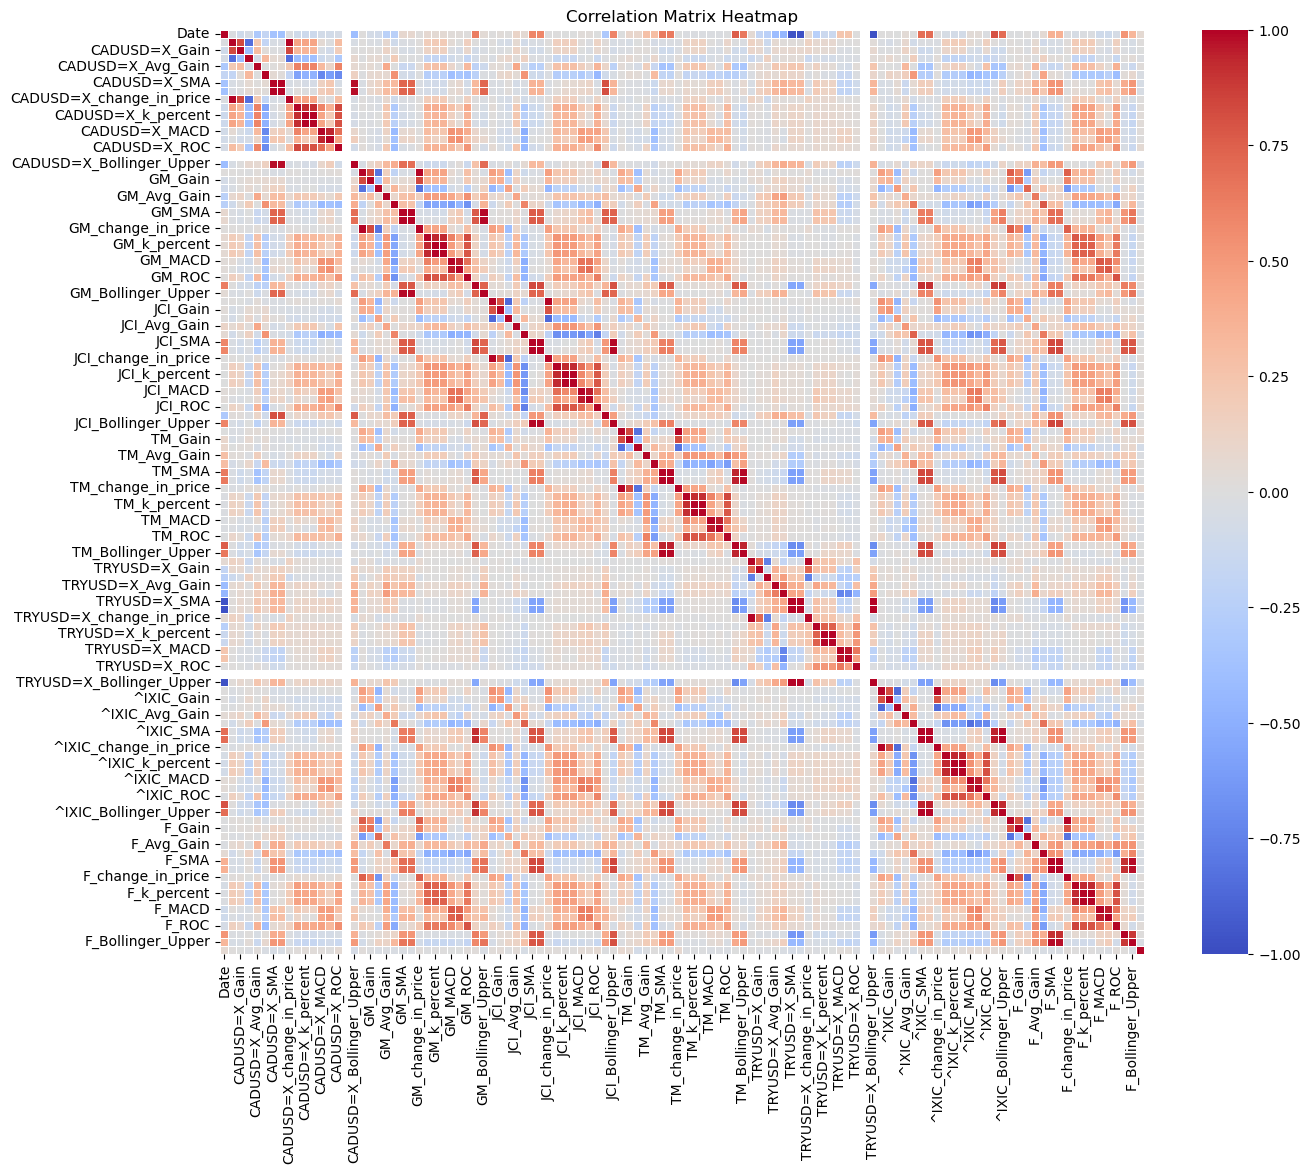

In [13]:
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, cmap="coolwarm", vmin=-1, vmax=1, center=0, square=True, linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [14]:
# Setting a threshold for multicollinearity to identify highly correlated features
threshold = 1
# Identifying highly correlated pairs
high_corr_pairs = correlation_matrix.abs().unstack().sort_values(ascending=False)
high_corr_pairs = high_corr_pairs[high_corr_pairs != 1]  # Remove self-correlation (1.0)

# Identify columns to drop to reduce multicollinearity
columns_to_drop = set()
for (feature1, feature2), corr_value in high_corr_pairs.items():
    if corr_value > threshold:
        # Only add feature2 to drop if feature1 has not already been marked for removal
        if feature1 not in columns_to_drop:
            columns_to_drop.add(feature2)

# Dropping the identified columns from the dataset
df_new = df.drop(columns=columns_to_drop)
df_new

,Date,CADUSD=X_Change,CADUSD=X_Gain,CADUSD=X_Loss,CADUSD=X_Avg_Gain,CADUSD=X_Avg_Loss,CADUSD=X_SMA,CADUSD=X_EMA,CADUSD=X_change_in_price,CADUSD=X_RSI,...,F_EMA,F_change_in_price,F_RSI,F_k_percent,F_MACD,F_MACD_EMA,F_ROC,F_PVT,F_Bollinger_Upper,F_prediction
0,2019-11-26 00:00:00+00:00,-0.000418,0.000000,0.000418,0.000289,0.000910,0.756581,0.756180,-0.000418,27.821853,...,8.851336,0.010000,62.087549,73.913071,0.006892,0.002249,-0.331855,2.394865e+06,9.188927,1
1,2019-11-27 00:00:00+00:00,0.001932,0.001932,0.000000,0.000427,0.000767,0.756063,0.755938,0.001932,42.880806,...,8.875019,0.090000,67.610216,89.583482,0.019164,0.005663,0.220269,2.768411e+06,9.183159,0
2,2019-11-29 00:00:00+00:00,-0.000607,0.000000,0.000607,0.000427,0.000641,0.755736,0.755661,-0.000607,39.864127,...,8.892636,-0.040000,62.910674,81.250149,0.025755,0.009711,0.221244,2.710846e+06,9.165730,0
3,2019-12-02 00:00:00+00:00,-0.000238,0.000000,0.000238,0.000419,0.000658,0.755404,0.755387,-0.000238,38.634678,...,8.903813,-0.050000,57.178300,70.833433,0.027163,0.013223,2.270145,2.505366e+06,9.172619,0
4,2019-12-03 00:00:00+00:00,-0.001081,0.000000,0.001081,0.000419,0.000707,0.754937,0.755037,-0.001081,33.260985,...,8.902498,-0.120000,45.657569,45.833433,0.019687,0.014522,1.137661,1.963927e+06,9.166840,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1232,2024-10-22 00:00:00+00:00,-0.001776,0.000000,0.001776,0.000308,0.001477,0.733303,0.730472,-0.001776,22.129881,...,10.840467,0.230000,63.192190,91.764633,0.063288,0.007636,6.315788,6.779642e+07,11.195281,0
1233,2024-10-23 00:00:00+00:00,0.000905,0.000905,0.000000,0.000245,0.001477,0.732536,0.729835,0.000905,28.290869,...,10.861375,-0.049999,59.825069,80.219848,0.071755,0.020460,4.635769,6.762839e+07,11.223237,1
1234,2024-10-24 00:00:00+00:00,-0.001072,0.000000,0.001072,0.000245,0.001513,0.731416,0.729157,-0.001072,25.529720,...,10.897435,0.179999,67.105734,98.850548,0.091931,0.034754,7.149667,6.835647e+07,11.282170,0
1235,2024-10-25 00:00:00+00:00,-0.000866,0.000000,0.000866,0.000245,0.001406,0.730423,0.728461,-0.000866,23.401396,...,10.913869,-0.170000,56.038726,72.631549,0.093129,0.046429,4.237286,6.776479e+07,11.312438,1


In [15]:
independent_vars = df_new.drop(columns=['F_prediction'])

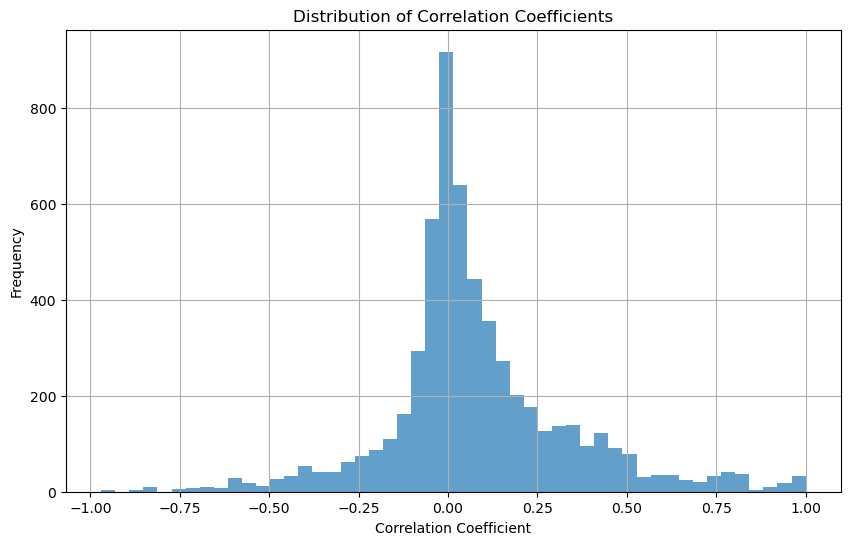

In [16]:
# Compute the correlation matrix for all variables

corr_matrix = independent_vars.corr()

# Extract the upper triangle of the correlation matrix to avoid duplication
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Flatten the upper triangle to create a list of correlations
correlation_values = upper_triangle.stack().values

# Plot a histogram of the correlation values
plt.figure(figsize=(10, 6))
plt.hist(correlation_values, bins=50, alpha=0.7)
plt.title("Distribution of Correlation Coefficients")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Frequency")
plt.grid()
plt.show()

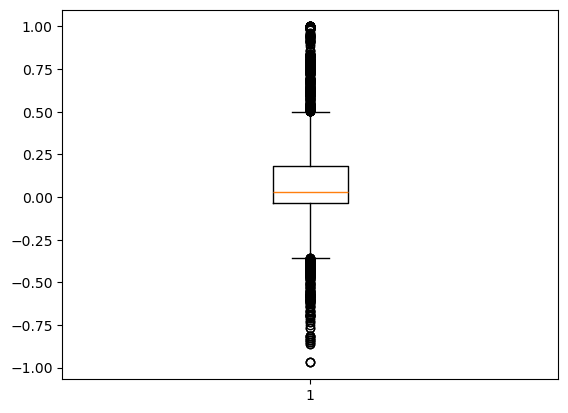

In [17]:
plt.boxplot(correlation_values)
plt.show()

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix

In [19]:
numeric_data = df_new.select_dtypes(include=np.number)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)


In [20]:
# Apply PCA
pca = PCA()
pca_results = pca.fit_transform(scaled_data)



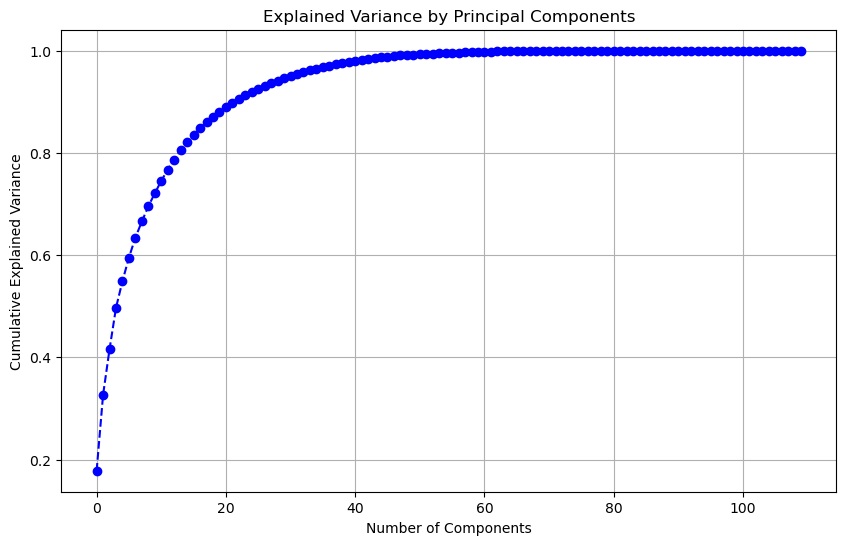

np.int64(31)

In [21]:
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(explained_variance_ratio, marker='o', linestyle='--', color='b')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Identify number of components explaining ~95% of variance
n_components_95 = np.argmax(explained_variance_ratio >= 0.95) + 1

n_components_95

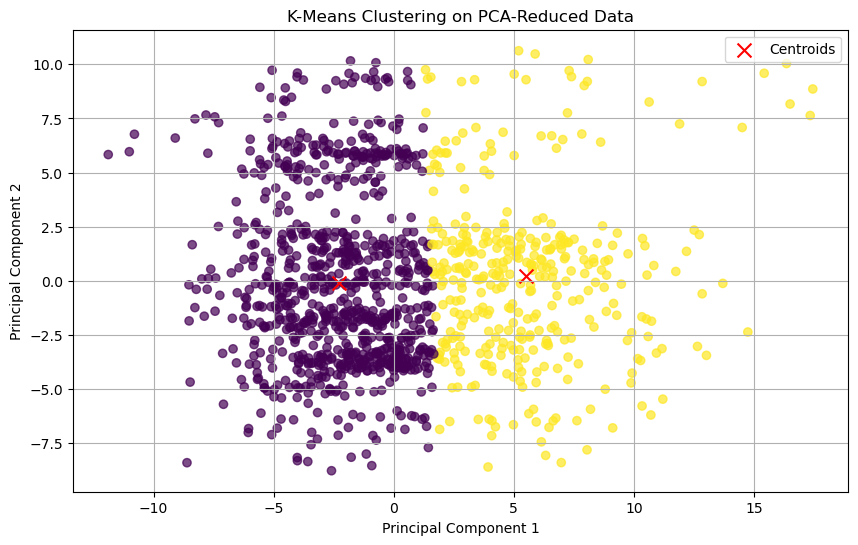

In [22]:


# Reduce data to 2 principal components for visualization
pca_2d = PCA(n_components=2)
reduced_data_2d = pca_2d.fit_transform(scaled_data)

# Apply K-Means clustering with an arbitrary choice of 3 clusters for visualization
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(reduced_data_2d)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data_2d[:, 0], reduced_data_2d[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='x', s=100, label='Centroids')
plt.title('K-Means Clustering on PCA-Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()

In [23]:
actual_labels = df_new['F_prediction'].dropna().values
report = classification_report(actual_labels, clusters, target_names=["Sell (0)", "Buy (1)"], output_dict=True)

In [24]:
# Display the classification report
classification_df = pd.DataFrame(report)
classification_df

,Sell (0),Buy (1),accuracy,macro avg,weighted avg
precision,0.502288,0.468320,0.49232,0.485304,0.485675
recall,0.694620,0.280992,0.49232,0.487806,0.492320
f1-score,0.583001,0.351240,0.49232,0.467120,0.469650
support,632.000000,605.000000,0.49232,1237.000000,1237.000000


<Figure size 800x600 with 0 Axes>

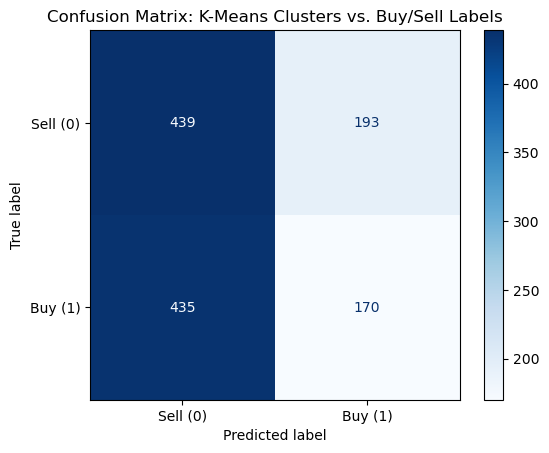

In [25]:
# Generate a confusion matrix comparing K-Means clusters to the F_Close_pred_class labels
conf_matrix = confusion_matrix(actual_labels,clusters)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Sell (0)", "Buy (1)"])
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix: K-Means Clusters vs. Buy/Sell Labels")
plt.grid(False)
plt.show()